# `Model Training`

> In this notebook, we have trained two models- `XGBoost` and `Multinominal Logistic Regression` and evaluate each model and also track their experimental results using ML Flow.

## 1. Import Required Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE, RandomOverSampler

import mlflow
from sklearn.model_selection import GridSearchCV
import subprocess
from pyngrok import ngrok

import warnings
warnings.filterwarnings('ignore')

## 2. Import Data

### 2.1 Imbalanced Datasets

In [2]:
X_train = np.load("data/Original/X_train.npy")
y_train = np.load("data/Original/y_train.npy")
X_val = np.load("data/Original/X_val.npy")
y_val = np.load("data/Original/y_val.npy")

In [3]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((208480, 68), (208480,), (52121, 68), (52121,))

### 2.2 Undersampled Datasets

In [4]:
X_train_under_sample = np.load("data/UnderSampling/X_train_undersample.npy")
y_train_under_sample = np.load("data/UnderSampling/y_train_undersample.npy")

### 2.3 Oversampled Datasets

In [5]:
X_train_over_sample = np.load("data/OverSampling/X_train_oversample.npy")
y_train_over_sample = np.load("data/OverSampling/y_train_oversample.npy")

### 2.4 SMOTE Datasets

In [6]:
X_train_smote = np.load("data/SMOTE/X_train_smote.npy")
y_train_smote = np.load("data/SMOTE/y_train_smote.npy")

## 3. Modeling, Training and Evaluation

### A. `XGBoost`

In [7]:
xgb_performance_dict = {
    'XGBoost on': ['Imbalanced', 'UnderSampled', 'OverSampled', 'SMOTE'],
    'F1-micro averaged Score on Train': [],
    'F1-micro averaged Score on Test': [],
    'Time Duration for model fitting': []
}

In [8]:
def XGB_model_fitting(X_train,X_test, y_train, y_test, dataset_type, xgb_dict=xgb_performance_dict):
    print("Model Fitting.....")
    xgb = XGBClassifier()
    
    # start time
    start_time = time.time()
    
    xgb.fit(X_train, y_train)
    
    # end time
    end_time = time.time()
    
    print("Successfully model fitted!!!")

    print("------------Training Prediction--------------")
    y_preds = xgb.predict(X_train)
    print(f"Classfifcation Report:\n\n{classification_report(y_train, y_preds)}\n\n")

    cf_matrix = confusion_matrix(y_train, y_preds)

    fig, ax = plt.subplots(figsize=(6,4))
    sns.heatmap(cf_matrix, annot=True, cmap='coolwarm', fmt='g')
    fig.suptitle(t="Confusion Matrix",
                 color="orange",
                 fontsize=16);
    ax.set(xlabel="Predicted Label",
           ylabel="Actual Label");
    f1_micro_avg_train = f1_score(y_train, y_preds, average='micro')

    print(f"Micro average F1 Score:\n\n{f1_micro_avg_train}")

    print("------------Test Prediction--------------")

    y_preds = xgb.predict(X_test)
    print(f"Classfifcation Report:\n\n{classification_report(y_test, y_preds)}\n\n")

    cf_matrix = confusion_matrix(y_test, y_preds)

    fig, ax = plt.subplots(figsize=(6,4))
    sns.heatmap(cf_matrix, annot=True, cmap='coolwarm', fmt='g')
    fig.suptitle(t="Confusion Matrix",
                 color="orange",
                 fontsize=16);
    ax.set(xlabel="Predicted Label",
           ylabel="Actual Label");
    f1_micro_avg_test = f1_score(y_test, y_preds, average='micro')
    print(f"Micro average F1 Score:\n\n{f1_micro_avg_test}")
    time_ellapsed = np.round(end_time - start_time, 2)
    print(f"Time for Model Training: {time_ellapsed}")
    xgb_dict['F1-micro averaged Score on Train'].append(f1_micro_avg_train)
    xgb_dict['F1-micro averaged Score on Test'].append(f1_micro_avg_test)
    xgb_dict['Time Duration for model fitting'].append(time_ellapsed)
    with mlflow.start_run(run_name=dataset_type):
        
        mlflow.log_metric("f1_micro_train", f1_micro_avg_train)
        mlflow.log_metric("f1_micro_val", f1_micro_avg_test)
        mlflow.log_metric("Train Duration", time_ellapsed)


**`XGBoost on Imbalanced Preprocessed Dataset`**

Model Fitting.....
Successfully model fitted!!!
------------Training Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       0.74      0.49      0.59     19954
           1       0.74      0.87      0.80    118772
           2       0.77      0.61      0.68     69754

    accuracy                           0.75    208480
   macro avg       0.75      0.66      0.69    208480
weighted avg       0.75      0.75      0.74    208480



Micro average F1 Score:

0.7470356868764388
------------Test Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       0.71      0.45      0.55      5170
           1       0.72      0.86      0.78     29487
           2       0.75      0.59      0.66     17464

    accuracy                           0.73     52121
   macro avg       0.73      0.63      0.66     52121
weighted avg       0.73      0.73      0.72     52121



Micro 

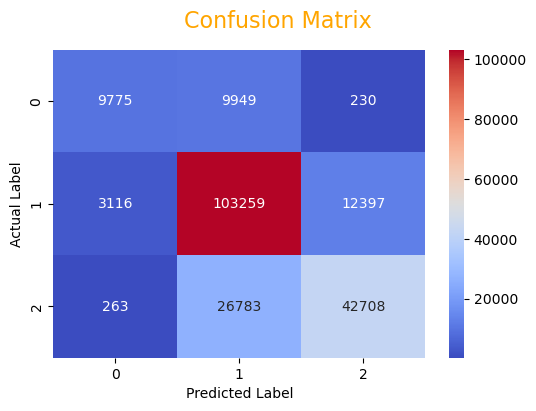

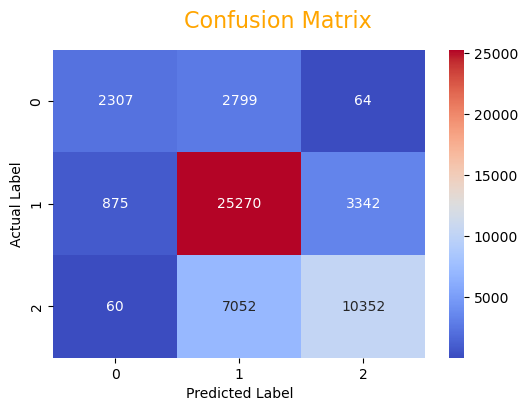

In [9]:
XGB_model_fitting(X_train, X_val, y_train, y_val, "imbalanced_XGBoost")

**`XGBoost on UnderSampled Preprocessed Dataset`**

Model Fitting.....
Successfully model fitted!!!
------------Training Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       0.83      0.87      0.85     19954
           1       0.69      0.65      0.67     19954
           2       0.77      0.78      0.78     19954

    accuracy                           0.77     59862
   macro avg       0.76      0.77      0.77     59862
weighted avg       0.76      0.77      0.77     59862



Micro average F1 Score:

0.7673649393605292
------------Test Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       0.41      0.83      0.55      5170
           1       0.78      0.57      0.66     29487
           2       0.63      0.72      0.67     17464

    accuracy                           0.65     52121
   macro avg       0.61      0.71      0.63     52121
weighted avg       0.69      0.65      0.65     52121



Micro 

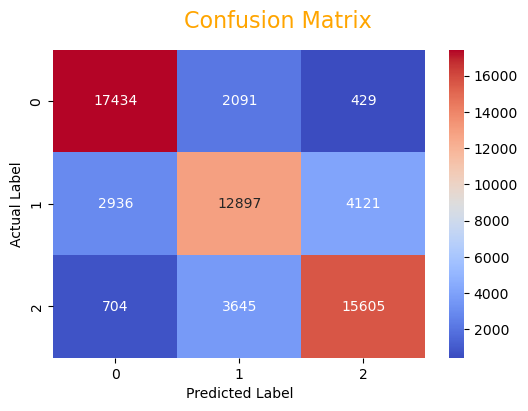

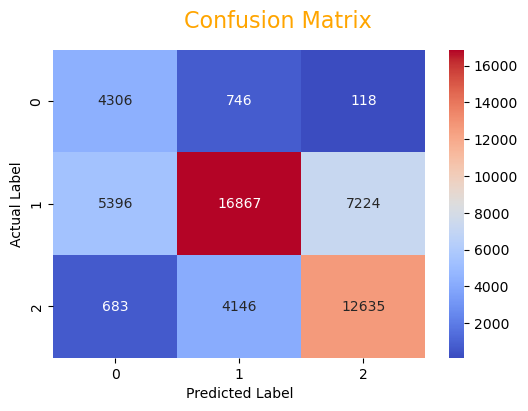

In [10]:
XGB_model_fitting(X_train_under_sample, X_val, y_train_under_sample, y_val, "Oversample_XGBoost")

**`XGBoost on OverSampled Preprocessed Dataset`**

Model Fitting.....
Successfully model fitted!!!
------------Training Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       0.82      0.88      0.85    118772
           1       0.66      0.62      0.64    118772
           2       0.76      0.76      0.76    118772

    accuracy                           0.75    356316
   macro avg       0.75      0.75      0.75    356316
weighted avg       0.75      0.75      0.75    356316



Micro average F1 Score:

0.7509738546683281
------------Test Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       0.43      0.82      0.57      5170
           1       0.78      0.60      0.68     29487
           2       0.65      0.73      0.69     17464

    accuracy                           0.67     52121
   macro avg       0.62      0.72      0.65     52121
weighted avg       0.70      0.67      0.67     52121



Micro 

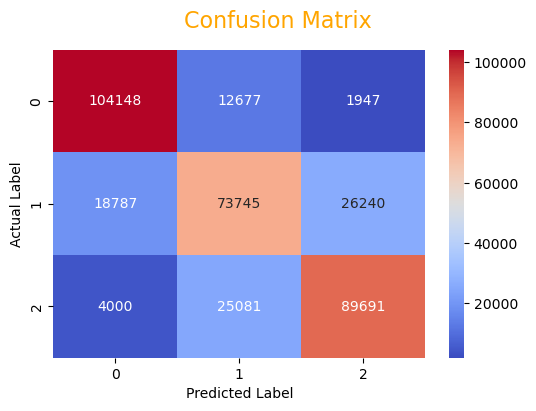

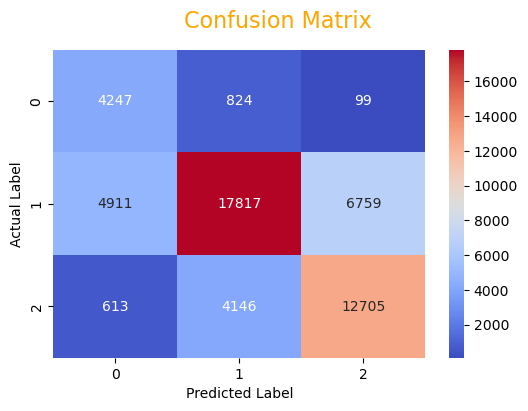

In [11]:
XGB_model_fitting(X_train_over_sample, X_val, y_train_over_sample, y_val, "Oversample_XGBoost")

**`XGBoost on SMOTE Preprocessed Dataset`**

Model Fitting.....
Successfully model fitted!!!
------------Training Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       0.90      0.88      0.89    118772
           1       0.73      0.81      0.77    118772
           2       0.81      0.73      0.77    118772

    accuracy                           0.81    356316
   macro avg       0.81      0.81      0.81    356316
weighted avg       0.81      0.81      0.81    356316



Micro average F1 Score:

0.8076398477755701
------------Test Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       0.63      0.54      0.58      5170
           1       0.73      0.80      0.76     29487
           2       0.71      0.62      0.66     17464

    accuracy                           0.72     52121
   macro avg       0.69      0.66      0.67     52121
weighted avg       0.71      0.72      0.71     52121



Micro 

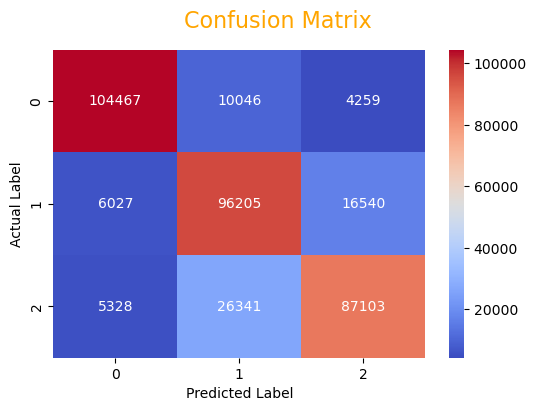

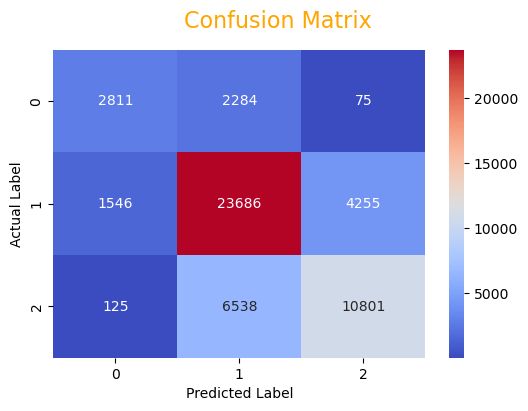

In [12]:
XGB_model_fitting(X_train_smote, X_val, y_train_smote, y_val, "SMOTE_XGBoost")

In [13]:
xgb_performance_df = pd.DataFrame(xgb_performance_dict)

In [14]:
xgb_performance_df

,XGBoost on,F1-micro averaged Score on Train,F1-micro averaged Score on Test,Time Duration for model fitting
0,Imbalanced,0.747036,0.727711,38.23
1,UnderSampled,0.767365,0.648645,10.97
2,OverSampled,0.750974,0.667082,66.11
3,SMOTE,0.807640,0.715604,71.83


## `Conclusion:`
> * `XGBoost` performs very well even with imbalanced dataset because XGBoost uses an ensemble of decision trees, each trained on a different subset of the data, and combines their predictions to make the final prediction. This ensemble approach helps to mitigate the effects of imbalanced data by giving more weight to the minority class during the training process.


### `Saving our Best Model`
>We select XGBoost model trained on Imbalanced dataset as our best model

In [15]:
import pickle

In [16]:
imbalanced_xgb_clf = XGBClassifier()
imbalanced_xgb_clf.fit(X_train, y_train)

pickle.dump(imbalanced_xgb_clf, open("imbalanced_xgb.pkl", "wb"))

### B. `Multinomical Logistic Regression`

**HELPER FUNCTIONS**

In [17]:
def run_mlflow_ui():
    proc = subprocess.Popen(["mlflow", "ui"])
    public_url = ngrok.connect(addr = "5000")
    print("MlFlow UI can be accessed at :", public_url)

In [18]:
run_mlflow_ui()

t=2023-05-03T15:19:19+0545 lvl=warn msg="ngrok config file found at legacy location, move to XDG location" xdg_path="C:\\Users\\Abhishek Thapa\\AppData\\Local/ngrok/ngrok.yml" legacy_path="C:\\Users\\Abhishek Thapa\\.ngrok2\\ngrok.yml"
t=2023-05-03T15:19:19+0545 lvl=warn msg="can't bind default web address, trying alternatives" obj=web addr=127.0.0.1:4040


MlFlow UI can be accessed at : NgrokTunnel: "https://4548-2400-1a00-bd11-ef38-fd93-8219-54d-5d0f.ngrok.io" -> "http://localhost:5000"


In [19]:
def plot_confusion_matrix(true, predicted):
    """
    Generate the confusion matrix and classification report
    """
    cm = confusion_matrix(true, predicted)
    cr = classification_report(true, predicted)
    conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:1','Predicted:2','Predicted:3'],
                                             index=['Actual:1','Actual:2','Actual:3'])
    # confusion matrix in heatmap
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    print(cr) 
    f1_micro = f1_score(true, predicted, average='micro')
    return f1_micro

In [20]:
def evaluate_model(model):
    
    print("Evaluating Model")
    
    # Make predictions
    y_train_pred = model.predict(X_train_smote)
    y_val_pred = model.predict(X_val)
    
    # Calculate micro averaged f1-score
    f1_micro_train = f1_score(y_train_smote, y_train_pred, average='micro')
    f1_micro_val = f1_score(y_val, y_val_pred, average='micro')
    
    print("Finished Evaluating Model")
    
    return f1_micro_train, f1_micro_val, y_train_pred, y_val_pred

In [21]:
def grid_search_cv(estimator, X_train, y_train, param_grid):
    
    print("Performing GridSearchCv")
    
    grid_search = GridSearchCV(estimator=estimator, param_grid=param_grid)
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    print("Finished GridSearchCv")
    return best_params

In [22]:
def train_model(estimator,X, y, best_params, estimator_name, dataset_type):
    
    print("Training Model")
    
    best_estimator = estimator.set_params(**best_params)
    
    # start time
    start_time = time.time()
    
    best_estimator.fit(X, y)
    
    # end time
    end_time = time.time()
    
    duration = np.round(end_time-start_time, 2)
    
    f1_micro_train, f1_micro_val, _ , y_val_pred = evaluate_model(best_estimator)
    
    log_results(best_params, best_estimator, estimator_name, f1_micro_train, f1_micro_val, dataset_type, duration)
    
    print("Successfull")
    
    return y_val_pred

In [23]:
def log_results(best_params, estimator, estimator_name, f1_micro_train, f1_micro_val, dataset_type, duration):
    
    print("Logging Results")
    
    with mlflow.start_run(run_name=dataset_type):
        
        mlflow.sklearn.log_model(estimator, estimator_name)
        
        mlflow.log_metric("f1_micro_train", f1_micro_train)
        mlflow.log_metric("f1_micro_val", f1_micro_val)
        mlflow.log_metric("Train Duration", duration)
        
        # Set best params
        for param_name, param_value in best_params.items():
            mlflow.log_param(param_name, param_value) 
    print("Finished Logging Results")

In [24]:
def MLR_model_fitting(X_train, y_train, dataset_type):
    # Instantiating the model
    estimator = LogisticRegression(multi_class='multinomial', solver='lbfgs')

    # Setting parameter grid
    softmax_params = {
        'C':  [0.001, 0.01, 0.1,1],
        'penalty': ['l2']
    }

    estimator_name = "softmax_regressor"

    best_params = grid_search_cv(estimator,X_train, y_train, softmax_params)
    print(f"Best Params for {dataset_type}: {best_params}")

    y_val_pred = train_model(estimator, X_train, y_train, best_params, estimator_name, dataset_type)

    f1_micro_score = plot_confusion_matrix(y_val, y_val_pred)

    print(f"F1 Micro Averaged Score = {f1_micro_score}")
    return best_params


**`Multinominal Logistic Regression on Imbalanced Dataset`**

Performing GridSearchCv
Finished GridSearchCv
Best Params for imbalanced_Multinominal_LR: {'C': 1, 'penalty': 'l2'}
Training Model
Evaluating Model
Finished Evaluating Model
Logging Results
Finished Logging Results
Successfull


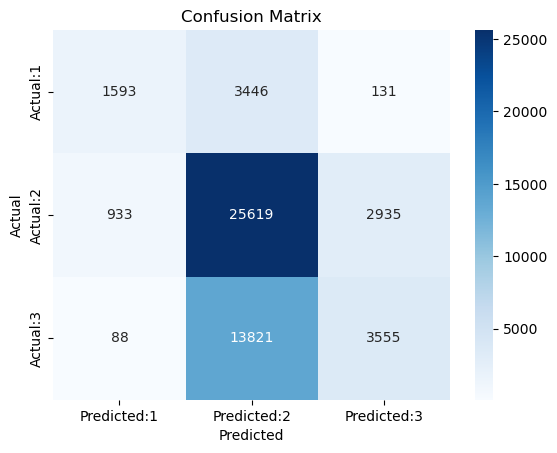

              precision    recall  f1-score   support

           0       0.61      0.31      0.41      5170
           1       0.60      0.87      0.71     29487
           2       0.54      0.20      0.30     17464

    accuracy                           0.59     52121
   macro avg       0.58      0.46      0.47     52121
weighted avg       0.58      0.59      0.54     52121

F1 Micro Averaged Score = 0.5902994954049232


In [25]:
imbalanced_best_params = MLR_model_fitting(X_train, y_train, "imbalanced_Multinominal_LR")

In [26]:
feature_names  = ['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone',
       'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'count_families', 'has_secondary_use', 'has_secondary_use_agriculture',
       'has_secondary_use_hotel', 'has_secondary_use_rental',
       'has_secondary_use_institution', 'has_secondary_use_school',
       'has_secondary_use_industry', 'has_secondary_use_health_post',
       'has_secondary_use_gov_office', 'has_secondary_use_use_police',
       'has_secondary_use_other', 'land_surface_condition_n',
       'land_surface_condition_o', 'land_surface_condition_t',
       'foundation_type_h', 'foundation_type_i', 'foundation_type_r',
       'foundation_type_u', 'foundation_type_w', 'roof_type_n', 'roof_type_q',
       'roof_type_x', 'ground_floor_type_f', 'ground_floor_type_m',
       'ground_floor_type_v', 'ground_floor_type_x', 'ground_floor_type_z',
       'other_floor_type_j', 'other_floor_type_q', 'other_floor_type_s',
       'other_floor_type_x', 'position_j', 'position_o', 'position_s',
       'position_t', 'plan_configuration_a', 'plan_configuration_c',
       'plan_configuration_d', 'plan_configuration_f', 'plan_configuration_m',
       'plan_configuration_n', 'plan_configuration_o', 'plan_configuration_q',
       'plan_configuration_s', 'plan_configuration_u',
       'legal_ownership_status_a', 'legal_ownership_status_r',
       'legal_ownership_status_v', 'legal_ownership_status_w']

In [27]:
len(feature_names)

68

In [28]:
softmax_model = LogisticRegression(multi_class='multinomial', solver='lbfgs').set_params(**imbalanced_best_params)
softmax_model.fit(X_train, y_train)

LogisticRegression(C=1, multi_class='multinomial')

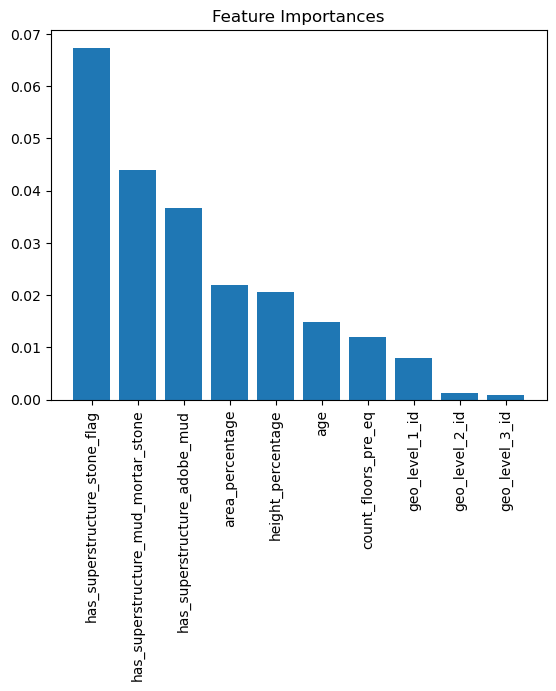

In [29]:
# Get the feature importances
importances = np.abs(softmax_model.coef_).sum(axis=0)
importances /= np.sum(importances)

# Top 10 importances
importances = importances[:10]

indices = np.argsort(importances)[::-1]


important_feature = []
for i in indices:
    important_feature.append(feature_names[i])
    
plt.title("Feature Importances")
plt.bar(range(10), importances[indices])
plt.xticks(range(10), important_feature, rotation=90)
plt.show()

**`Multinominal Logistic Regression on UnderSampled Dataset`**

Performing GridSearchCv
Finished GridSearchCv
Best Params for Undersampled_Multinominal_LR: {'C': 1, 'penalty': 'l2'}
Training Model
Evaluating Model
Finished Evaluating Model
Logging Results
Finished Logging Results
Successfull


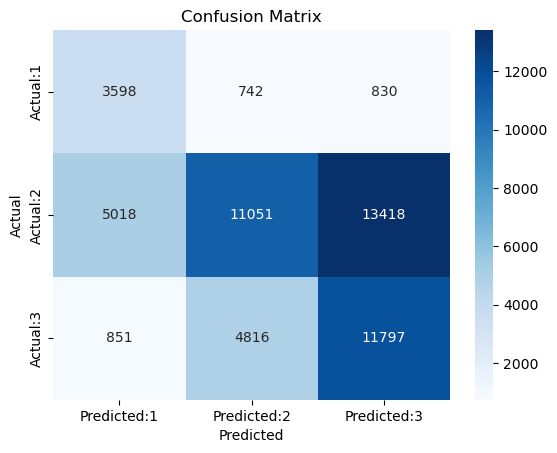

              precision    recall  f1-score   support

           0       0.38      0.70      0.49      5170
           1       0.67      0.37      0.48     29487
           2       0.45      0.68      0.54     17464

    accuracy                           0.51     52121
   macro avg       0.50      0.58      0.50     52121
weighted avg       0.57      0.51      0.50     52121

F1 Micro Averaged Score = 0.5073962510312542


In [30]:
under_sample_best_params = MLR_model_fitting(X_train_under_sample, y_train_under_sample, "Undersampled_Multinominal_LR")

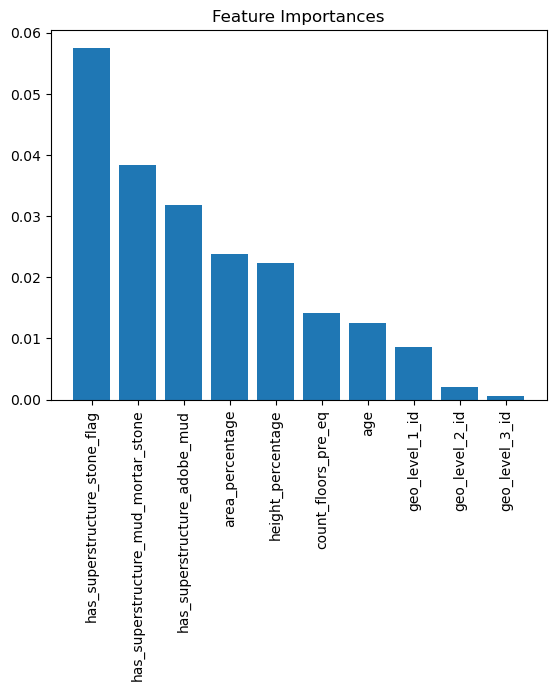

In [31]:
softmax_model = LogisticRegression(multi_class='multinomial', solver='lbfgs').set_params(**under_sample_best_params)
softmax_model.fit(X_train_under_sample, y_train_under_sample)

# Get the feature importances
importances = np.abs(softmax_model.coef_).sum(axis=0)
importances /= np.sum(importances)

# Top 10 importances
importances = importances[:10]

indices = np.argsort(importances)[::-1]


important_feature = []
for i in indices:
    important_feature.append(feature_names[i])
    
plt.title("Feature Importances")
plt.bar(range(10), importances[indices])
plt.xticks(range(10), important_feature, rotation=90)
plt.show()

**`Multinominal Logistic Regression on OverSampled Dataset`**

Performing GridSearchCv
Finished GridSearchCv
Best Params for Oversampled_Multinominal_LR: {'C': 0.01, 'penalty': 'l2'}
Training Model
Evaluating Model
Finished Evaluating Model
Logging Results
Finished Logging Results
Successfull


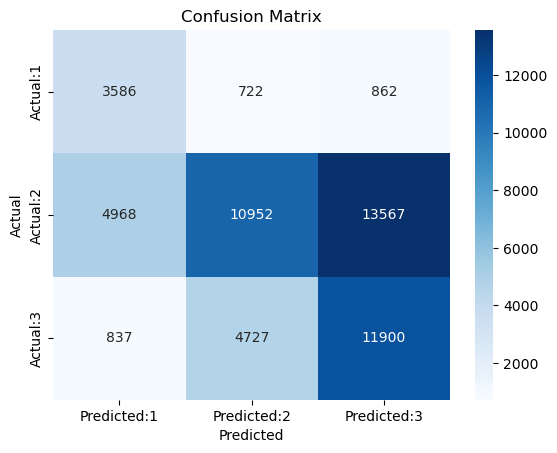

              precision    recall  f1-score   support

           0       0.38      0.69      0.49      5170
           1       0.67      0.37      0.48     29487
           2       0.45      0.68      0.54     17464

    accuracy                           0.51     52121
   macro avg       0.50      0.58      0.50     52121
weighted avg       0.57      0.51      0.50     52121

F1 Micro Averaged Score = 0.5072427620344967


In [32]:
over_sample_best_params = MLR_model_fitting(X_train_over_sample, y_train_over_sample, "Oversampled_Multinominal_LR")

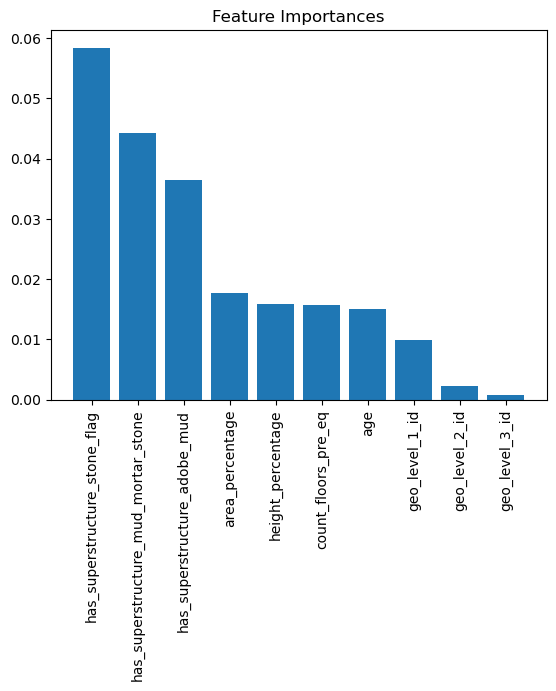

In [33]:
softmax_model = LogisticRegression(multi_class='multinomial', solver='lbfgs').set_params(**over_sample_best_params)
softmax_model.fit(X_train_over_sample, y_train_over_sample)

# Get the feature importances
importances = np.abs(softmax_model.coef_).sum(axis=0)
importances /= np.sum(importances)

# Top 10 importances
importances = importances[:10]

indices = np.argsort(importances)[::-1]


important_feature = []
for i in indices:
    important_feature.append(feature_names[i])
    
plt.title("Feature Importances")
plt.bar(range(10), importances[indices])
plt.xticks(range(10), important_feature, rotation=90)
plt.show()

**`Multinominal Logistic Regression on SMOTE Dataset`**

Performing GridSearchCv
Finished GridSearchCv
Best Params for SMOTE_Multinominal_LR: {'C': 0.01, 'penalty': 'l2'}
Training Model
Evaluating Model
Finished Evaluating Model
Logging Results
Finished Logging Results
Successfull


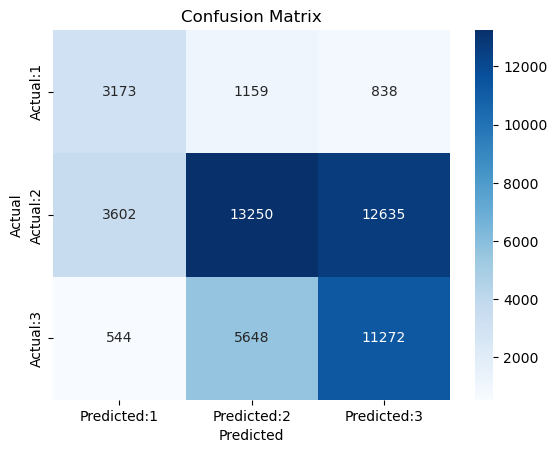

              precision    recall  f1-score   support

           0       0.43      0.61      0.51      5170
           1       0.66      0.45      0.53     29487
           2       0.46      0.65      0.53     17464

    accuracy                           0.53     52121
   macro avg       0.52      0.57      0.53     52121
weighted avg       0.57      0.53      0.53     52121

F1 Micro Averaged Score = 0.5313597206500259


In [34]:
smote_best_params = MLR_model_fitting(X_train_smote, y_train_smote, "SMOTE_Multinominal_LR")

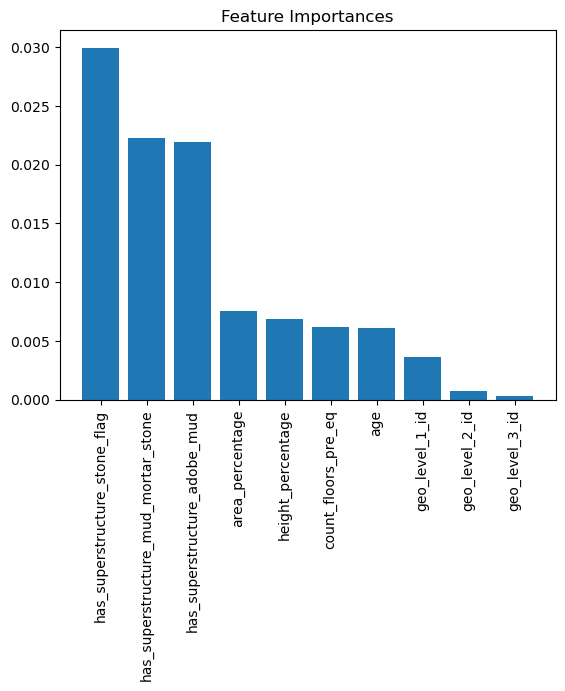

In [35]:
softmax_model = LogisticRegression(multi_class='multinomial', solver='lbfgs').set_params(**smote_best_params)
softmax_model.fit(X_train_smote, y_train_smote)

# Get the feature importances
importances = np.abs(softmax_model.coef_).sum(axis=0)
importances /= np.sum(importances)

# Top 10 importances
importances = importances[:10]

indices = np.argsort(importances)[::-1]


important_feature = []
for i in indices:
    important_feature.append(feature_names[i])
    
plt.title("Feature Importances")
plt.bar(range(10), importances[indices])
plt.xticks(range(10), important_feature, rotation=90)
plt.show()

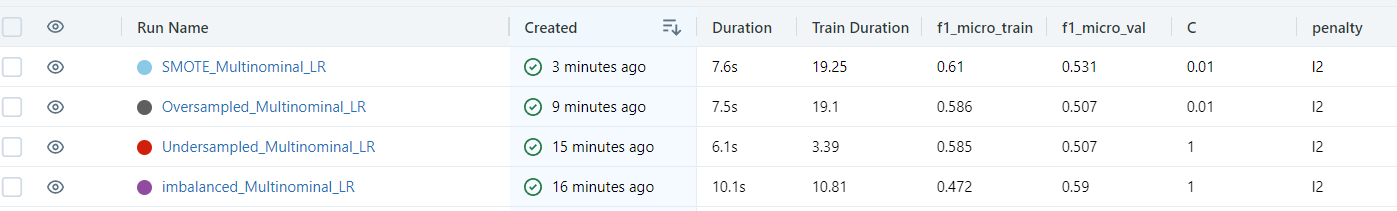

## `Conclusion`
> * `Multinominal Logistic Regression` does not perform well with imbalanced datasets.
> * `Multinominal Logistic Regression` performs better with SMOTE dataset.

### `Saving our Best Model`
>We select Multinominal LR model trained on SMOTE dataset as our best model.

In [37]:
smote_MultinominalLR_model = LogisticRegression(multi_class='multinomial', solver='lbfgs').set_params(**smote_best_params)
smote_MultinominalLR_model.fit(X_train_smote, y_train_smote)

pickle.dump(smote_MultinominalLR_model, open("smote_multinominalLR.pkl", "wb"))